In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data loading
df_train = pd.read_csv('train.csv',header=None)
df_trainLabels = pd.read_csv('trainLabels.csv',header=None)
df_test = pd.read_csv('test.csv',header=None)

In [3]:
# Remove outlier
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
df_trainout = df_train.clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis = 1)

In [4]:
# Remove outlier
Q1 = df_test.quantile(0.25)
Q3 = df_test.quantile(0.75)
IQR = Q3 - Q1
df_testout = df_test.clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis = 1)

In [5]:
# Standardize
df_trainstd = pd.DataFrame(StandardScaler().fit_transform(df_trainout))
df_teststd = pd.DataFrame(StandardScaler().fit_transform(df_testout))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


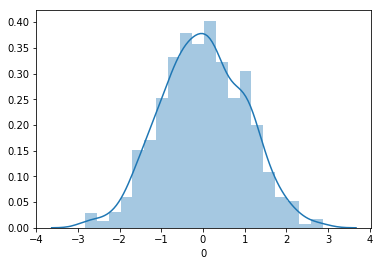

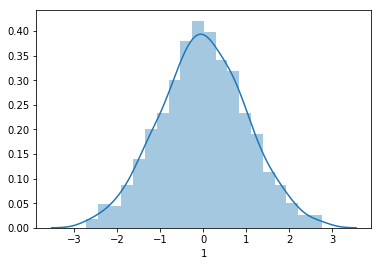

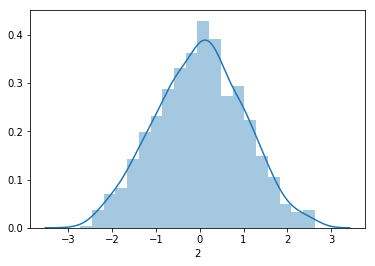

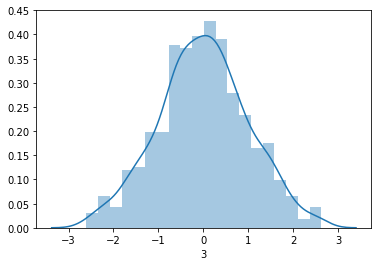

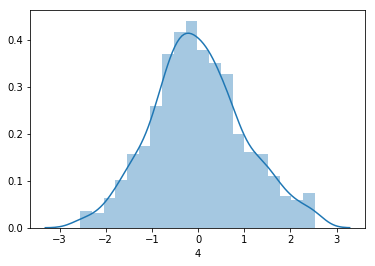

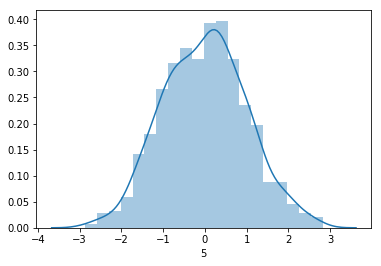

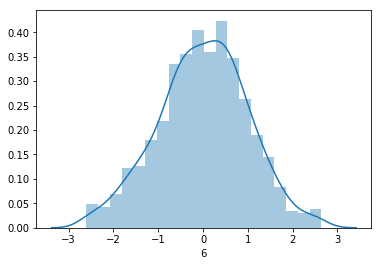

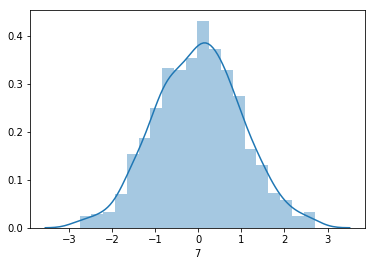

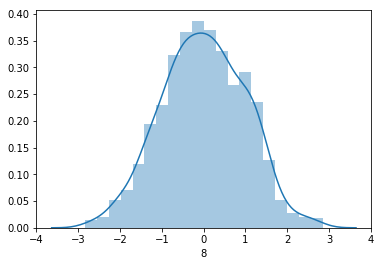

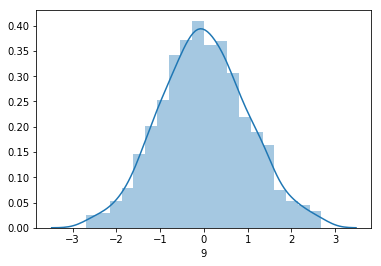

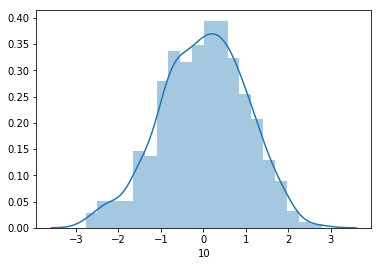

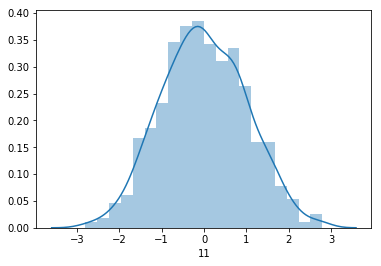

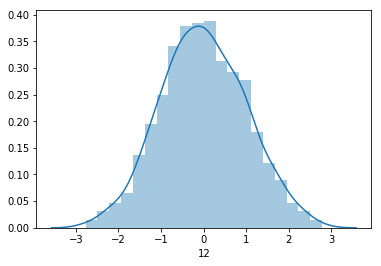

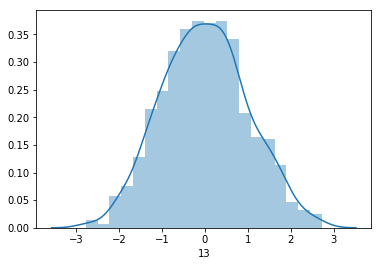

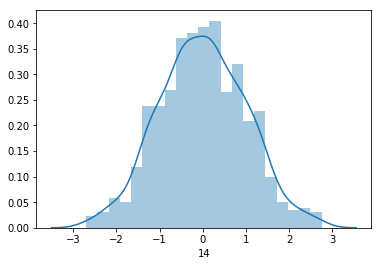

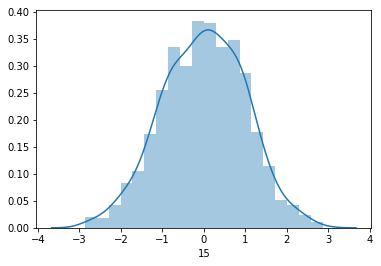

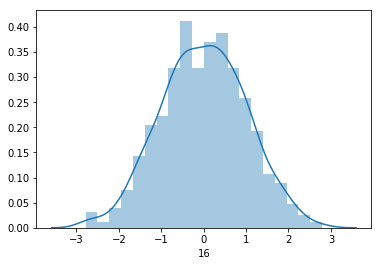

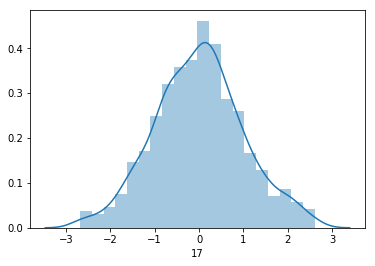

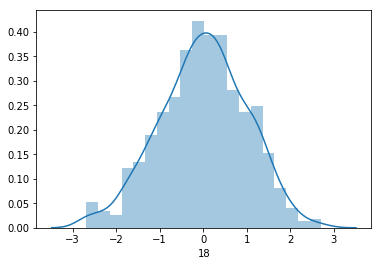

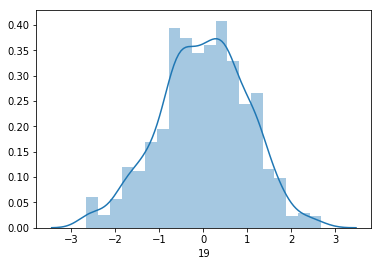

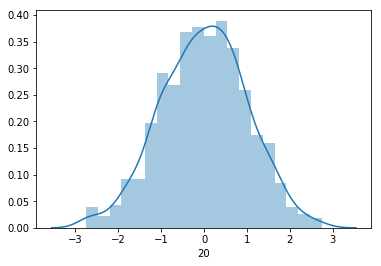

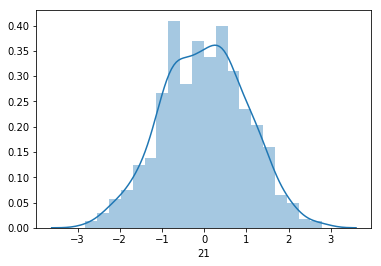

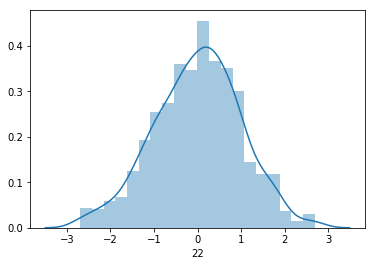

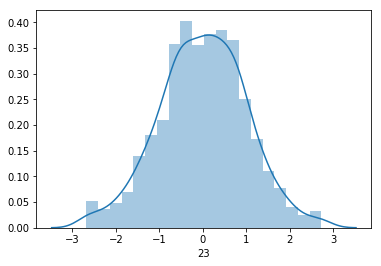

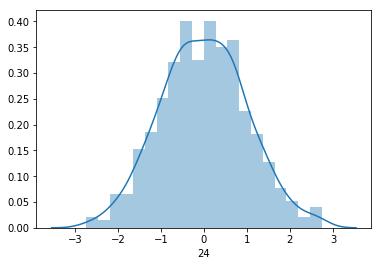

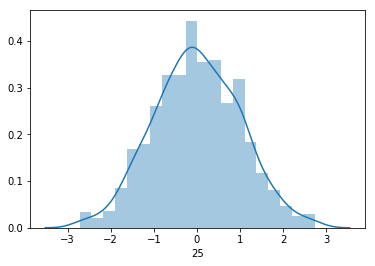

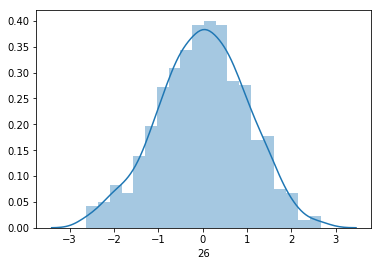

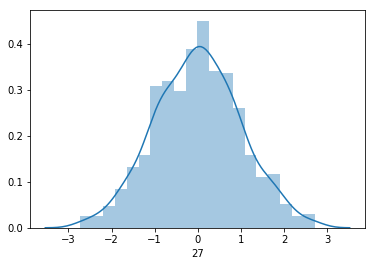

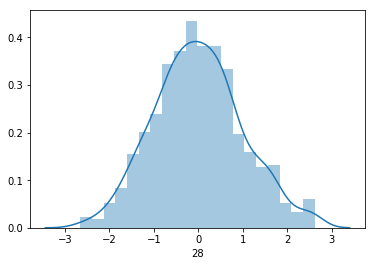

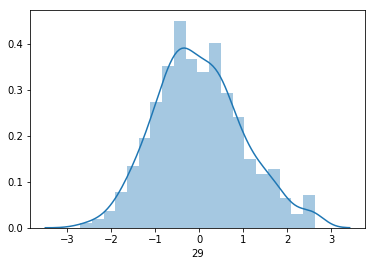

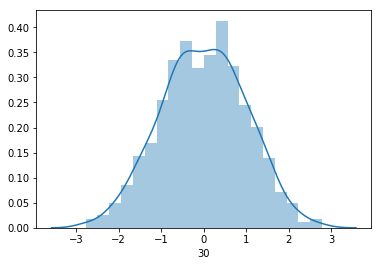

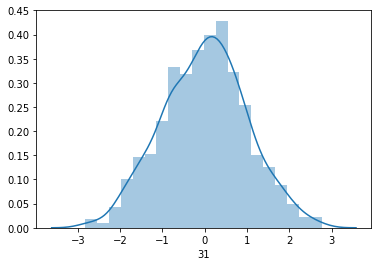

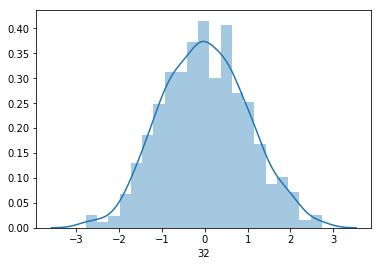

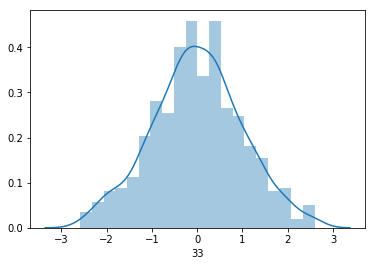

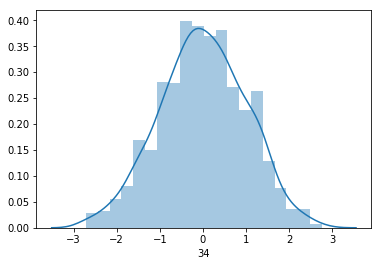

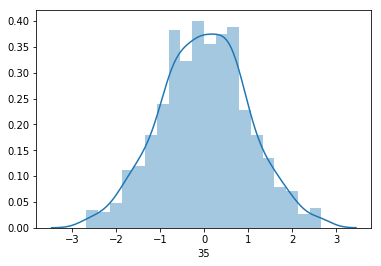

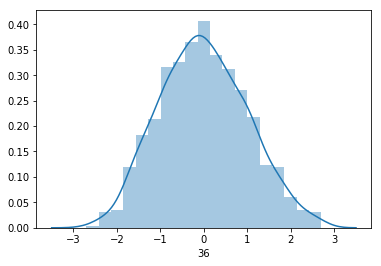

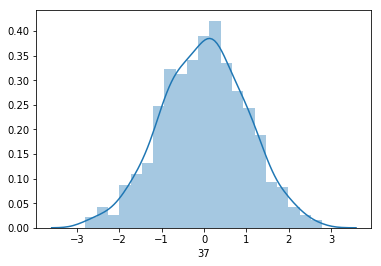

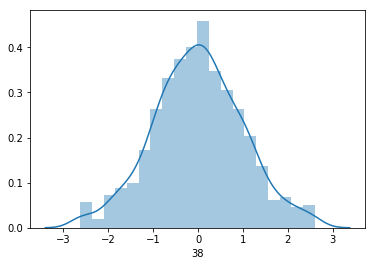

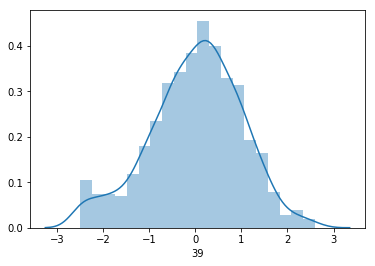

In [6]:
# Check bias
for i in df_trainstd:
    sns.distplot(df_trainstd[i], label = i)
    plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df_train, df_trainLabels, test_size=0.8, random_state=2)
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(cross_val_score(gbc, df_train, df_trainLabels, cv=5).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8025


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.861


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df_trainout, df_trainLabels, test_size=0.8, random_state=2)
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(cross_val_score(gbc, df_trainout, df_trainLabels, cv=5).mean())

0.7975


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8640000000000001


In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_trainstd, df_trainLabels, test_size=0.8, random_state=2)
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(cross_val_score(gbc, df_trainstd, df_trainLabels, cv=5).mean())

0.8


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8640000000000001


In [15]:
n_estimators = [50, 75, 100, 125, 150]
max_depth = [1, 2, 3, 4, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
grid_search = GridSearchCV(gbc, param_grid, n_jobs=-1)
grid_result = grid_search.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_trainstd, df_trainLabels, test_size=0.8, random_state=2)
gbc_bestparam = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'])

gbc_bestparam.fit(x_train, y_train)
y_pred = gbc_bestparam.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(cross_val_score(gbc_bestparam, df_trainstd, df_trainLabels, cv=5).mean())

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.80875


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8690000000000001


In [17]:
# Create prediction
y_pred = gbc_bestparam.predict(df_teststd)

In [18]:
# Output result
data=[]
for i in range(9000):
    data.append([i+1,y_pred[i]])
data = pd.DataFrame(data,columns=['ID','Solution'],index=None)
data.to_csv('Result.csv', sep=',',index=None)